## IE6511 Homework 1 
Done by: Aloisius Stephen and Yang Xiaozhou

In [2]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

font = {'family' : 'sans-serif',
        'weight' : 'normal',
        'size'   : 12}

matplotlib.rc('font', **font)

### 1. Simple optimization algorithms: 
Your assignment is to write a code using greedy, random walk or random search   to minimize the following simple one-dimensional cost function:

Cost(s) = (400 – (s – 21)2) $*$ sin(s$*$pi/6)

Constraints: s is integer-valued and 0 s 500

When applicable we will use the following basic neighborhood function: For each element $S_{current}$, the neighborhood $N(S_{current})$ is in the range (0,500) and is no more than 25 in distance from $S_{current}$.  To pick a point in the neighborhood for a search algorithm, pick a neighboring solution, s, randomly so that $\max(S_{current} -25,0)  \leq s \leq  min(S_{current} +25, 500)$.

## Part a
a.	Write a MATLAB function cost.m that implements the cost function, i.e. accepts input s, and returns COST(s).  Make sure the cost function is correct (i.e.$COST(10) \simeq -241.621$).  Submit a plot of the given cost function with respect to s over the range of s. 

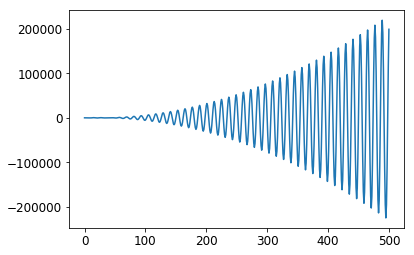

In [3]:
def cost(s):
    return (400 - pow(s-21,2)) * np.sin(s*np.pi/6)

s = np.linspace(0,500,501,True)
fig = plt.plot(s,cost(s))

## Part b
b.	Write a MATLAB function neighbor.m that implements the neighborhood function, taking a single input s, and outputting a single neighboring value snew. (Note: s is not a neighbor of itself.) 

In [4]:
def neighbor(s):
    rnd = np.random.randint(1,51) # random number ranging from 1 to 50 inclusive
    if rnd <= 25:
        snew = max(s-rnd,0) # s - 1 to s - 25, or 0
    else:
        snew = min(s+(rnd-25),500) # s + 1 to s + 25, since here rnd ranges from 26 to 50, or 500
    return snew

## Part c
c.	Write a MATLAB function RW.m (Random Walk) which implements the Random Walk algorithm described (as a pseudocode) on the next page. The function should have two inputs: a starting point sInitial, and a maximum number of iterations to run maxIter. 

The output of the function is a matrix Solution with each row corresponding to the results for each iteration and columns corresponding to the following variables for each row.
i – the iteration number (same as the row number)
sCurrent – the value of s at iteration i
sBest – the value of s that had the lowest cost in the history of the search  (best solution to date).
costCurrent – the current cost, i.e.cost (sCurrent)
costBest - the lowest cost in the history of the search
This function should call cost.m and neighbor.m where needed. The header of this function should thus read:	 function solution = RW(sInitial, maxIter) We encourage you to keep record of sCurrent, costCurrent, sBest and costBest in your solution matrix.



________________________________________
Algorithm RW(sInitial, maxIter)
Begin 
    sCurrent=sInitial; sBest=sCurrent;
    costCurrent = cost(sInitial);
    costBest=costCurrent;
    Repeat
        sCurrent=Perturb(sCurrent);//Perturb represents a call to the neighbor function from part (b) and you are replacing old sCurrent with a new sCurrent
        costCurrent=cost(sCurrent);
        If costCurrent<costBest then
            costBest=costCurrent;
            sBest=sCurrent;
        Endif   (go back to perturb around the new sCurrent)
    Until time to stop
    Return(Solution)
End Algorithm
________________________________________


In [5]:
def RW(sInitial, maxIter):
    
    iter_num = []
    current_s = []
    best_s = []
    current_cost = []
    best_cost = []
    
    i = 1
    sCurrent = sInitial
    sBest = sInitial
    costCurrent = cost(sInitial)
    costBest = costCurrent
    
    while i <= maxIter:
        
        iter_num.append(i)
        best_s.append(sBest)
        best_cost.append(costBest)
        
        sCurrent = neighbor(sCurrent)
        costCurrent = cost(sCurrent)
        if costCurrent < costBest:
            costBest = costCurrent
            sBest = sCurrent

        current_s.append(sCurrent)
        current_cost.append(costCurrent)

        i+=1
        
    Solution = pd.DataFrame({"i": iter_num, "sCurrent": current_s, "sBest": best_s, 
                             "costCurrent": current_cost, "costBest": best_cost})
    return Solution

In [6]:
Solution = RW(0, 5000)

cols = ['i', 'sCurrent', 'sBest', 'costCurrent', 'costBest']
Solution = Solution[cols]
Solution.head()

i  sCurrent  sBest   costCurrent  costBest
0  1         0      0 -0.000000e+00      -0.0
1  2        15      0  3.640000e+02      -0.0
2  3         6      0  2.143132e-14      -0.0
3  4         1      0  0.000000e+00      -0.0
4  5         0      0 -0.000000e+00      -0.0

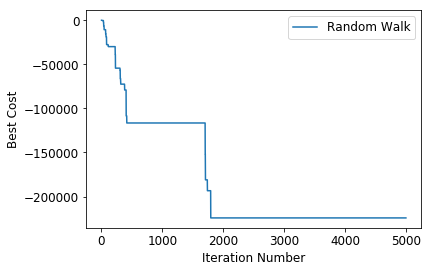

In [7]:
fig = plt.plot(Solution.i, Solution.costBest)
plt.xlabel('Iteration Number')
plt.ylabel('Best Cost')
plt.legend(['Random Walk'])

## Part d
d.	Write a MATLAB function RS.m which implements the RandomSampling algorithm described below (as pseudocode).  For Random Sampling define the neighborhood as the whole decision space.  With this neighborhood definition, the RandomSampling algorithm samples from all potential solutions at random. Follow the same conventions as in part (c).

In [8]:
def RS(sInitial, maxIter):
    
    iter_num = []
    current_s = []
    best_s = []
    current_cost = []
    best_cost = []
    
    i = 1
    sCurrent = sInitial
    sBest = sInitial
    costCurrent = cost(sInitial)
    costBest = costCurrent
    
    while i <= maxIter:
        
        iter_num.append(i)
        best_s.append(sBest)
        best_cost.append(costBest)
        
        neighbor_rs = sCurrent
        while neighbor_rs == sCurrent:
            neighbor_rs = np.random.randint(0,501)
            
        sCurrent = neighbor_rs
        costCurrent = cost(sCurrent)
        if costCurrent < costBest:
            costBest = costCurrent
            sBest = sCurrent

        current_s.append(sCurrent)
        current_cost.append(costCurrent)

        i+=1
        
    Solution = pd.DataFrame({"i": iter_num, "sCurrent": current_s, "sBest": best_s, 
                             "costCurrent": current_cost, "costBest": best_cost})
    return Solution

In [9]:
cols = ['i', 'sCurrent', 'sBest', 'costCurrent', 'costBest']
Solution_rs = RS(0, 5000)
Solution_rs = Solution_rs[cols]

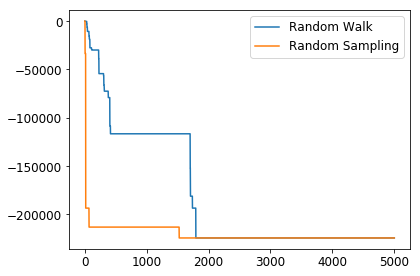

In [10]:
plt.plot(Solution.i, Solution.costBest)
plt.plot(Solution_rs.i, Solution_rs.costBest)
plt.legend(['Random Walk', 'Random Sampling'])
plt.tight_layout()

## Part e
## i)	
A MATLAB function GD.m (Greedy Deterministic) using a deterministic neighborhood definition: evaluate all solutions in the neighborhood defined by
max(s-10,0) ≤ s ≤ min(s+10, 500), except for s itself.  Include the necessary neighborhood (note that this neighborhood function is different from part b) and ‘improve’ coding within the GD.m function

In [11]:
def GD(sInitial, maxIter):
    
    iter_num = []
    current_s = []
    best_s = []
    current_cost = []
    best_cost = []
    
    i = 1
    sCurrent = sInitial
    sBest = sInitial
    costCurrent = cost(sInitial)
    costBest = costCurrent
    
    while i <= maxIter:
        
        iter_num.append(i)
        best_s.append(sBest)
        best_cost.append(costBest)
        
        # Find a neighbor
        start = np.maximum(sCurrent-10, 0)
        end = np.minimum(sCurrent+10, 500)

        best_neighbor_cost = cost(start)
        best_neighbor = start
        
        for x in range(start, end+1):
            curr_neighbor_cost = cost(x)
            if curr_neighbor_cost < best_neighbor_cost:
                best_neighbor = x
                best_neighbor_cost = curr_neighbor_cost

        # End of finding a neighbor    
        
        sCurrent = best_neighbor
        costCurrent = cost(sCurrent)
        if costCurrent < costBest:
            costBest = costCurrent
            sBest = sCurrent

        current_s.append(sCurrent)
        current_cost.append(costCurrent)

        i+=1
        
    Solution = pd.DataFrame({"i": iter_num, "sCurrent": current_s, "sBest": best_s, 
                             "costCurrent": current_cost, "costBest": best_cost})
    return Solution

In [12]:
cols = ['i', 'sCurrent', 'sBest', 'costCurrent', 'costBest']
Solution_gd = GD(0, 5000)
Solution_gd = Solution_gd[cols]

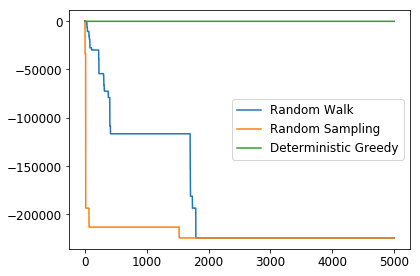

In [13]:
plt.plot(Solution.i, Solution.costBest)
plt.plot(Solution_rs.i, Solution_rs.costBest)
plt.plot(Solution_gd.i, Solution_gd.costBest)
plt.legend(['Random Walk', 'Random Sampling', 'Deterministic Greedy'])
plt.tight_layout()

## ii)	
A MATLAB function GS.m (Greedy Stochastic) using the stochastic neighborhood definition in neighbor.m (from part b) that continues searching until a maximum iteration limit is reached. Make sure your solution matrix keep record of sCurrent and costCurrent.

In [14]:
def GS(sInitial, maxIter):
    
    iter_num = []
    current_s = []
    best_s = []
    current_cost = []
    best_cost = []
    
    i = 1
    sCurrent = sInitial
    sBest = sInitial
    costCurrent = cost(sInitial)
    costBest = costCurrent
    
    while i <= maxIter:
        
        iter_num.append(i)
        best_s.append(sBest)
        best_cost.append(costBest)
        
        sCurrent = neighbor(sBest)
        costCurrent = cost(sCurrent)
        if costCurrent < costBest:
            costBest = costCurrent
            sBest = sCurrent

        current_s.append(sCurrent)
        current_cost.append(costCurrent)

        i+=1
        
    Solution = pd.DataFrame({"i": iter_num, "sCurrent": current_s, "sBest": best_s, 
                             "costCurrent": current_cost, "costBest": best_cost})
    return Solution

In [15]:
cols = ['i', 'sCurrent', 'sBest', 'costCurrent', 'costBest']
Solution_gs = GS(0, 5000)
Solution_gs = Solution_gs[cols]

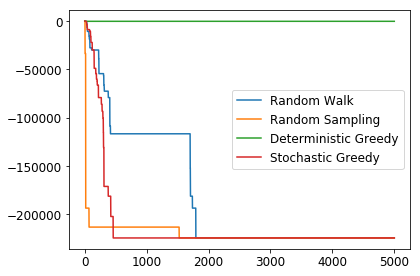

In [16]:
plt.plot(Solution.i, Solution.costBest)
plt.plot(Solution_rs.i, Solution_rs.costBest)
plt.plot(Solution_gd.i, Solution_gd.costBest)
plt.plot(Solution_gs.i, Solution_gs.costBest)
plt.legend(['Random Walk', 'Random Sampling', 'Deterministic Greedy', 'Stochastic Greedy'])
plt.tight_layout()

## Part f

In [17]:
maxIter = 200
ls_initials = np.random.randint(0,501,30)

## a)
a plot of sCurrent, and for  sBest vs. iterations for one run (i.e. you select one optimization trial).

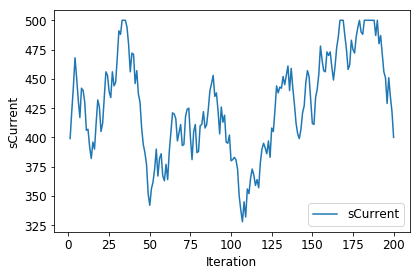

In [18]:
rw = RW(ls_initials[0], maxIter)

#sCurrent plot
plt.plot(rw.i, rw.sCurrent)
plt.xlabel('Iteration')
plt.ylabel('sCurrent')
plt.legend(['sCurrent'])
plt.tight_layout()

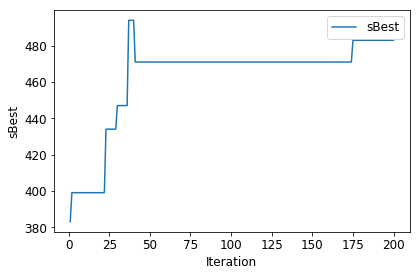

In [19]:
# sBest plot
plt.plot(rw.i, rw.sBest)
plt.xlabel('Iteration')
plt.ylabel('sBest')
plt.legend(['sBest'])
plt.tight_layout()

## b)

In [20]:
cols = ['i', 'sCurrent', 'sBest', 'costCurrent', 'costBest']

rw_combine = RW(ls_initials[0], maxIter)[cols]
rs_combine = RS(ls_initials[0], maxIter)[cols]
gd_combine = GD(ls_initials[0], maxIter)[cols]
gs_combine = GS(ls_initials[0], maxIter)[cols]

for val in ls_initials[1:]:

    rw_combine = rw_combine.append(RW(val, maxIter)[cols])
    rs_combine = rs_combine.append(RS(val, maxIter)[cols])
    gd_combine = gd_combine.append(GD(val, maxIter)[cols])
    gs_combine = gs_combine.append(GS(val, maxIter)[cols])

For the RW algorithm, submit a plot of the average of costCurrent, average of costBest vs. iterations.

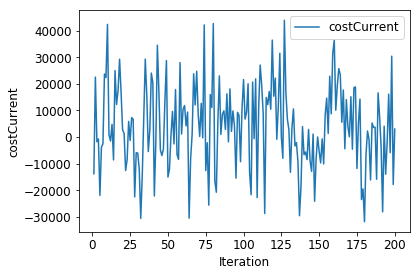

In [21]:
#average of costCurrent plot
plt.plot(rw_combine.groupby('i').mean().costCurrent)
plt.xlabel('Iteration')
plt.ylabel('costCurrent')
plt.legend(['costCurrent'])
plt.tight_layout()

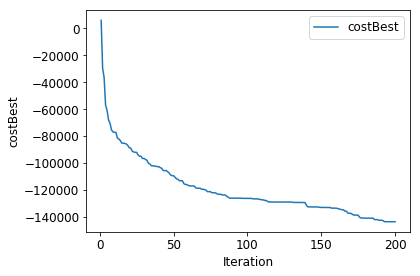

In [22]:
# average of costBest plot
plt.plot(rw_combine.groupby('i').mean().costBest)
plt.xlabel('Iteration')
plt.ylabel('costBest')
plt.legend(['costBest'])
plt.tight_layout()

Submit a plot that compares the averages of costBest vs. iterations for all four algorithms. All ‘averages’ are over the 30 runs for each iteration number.

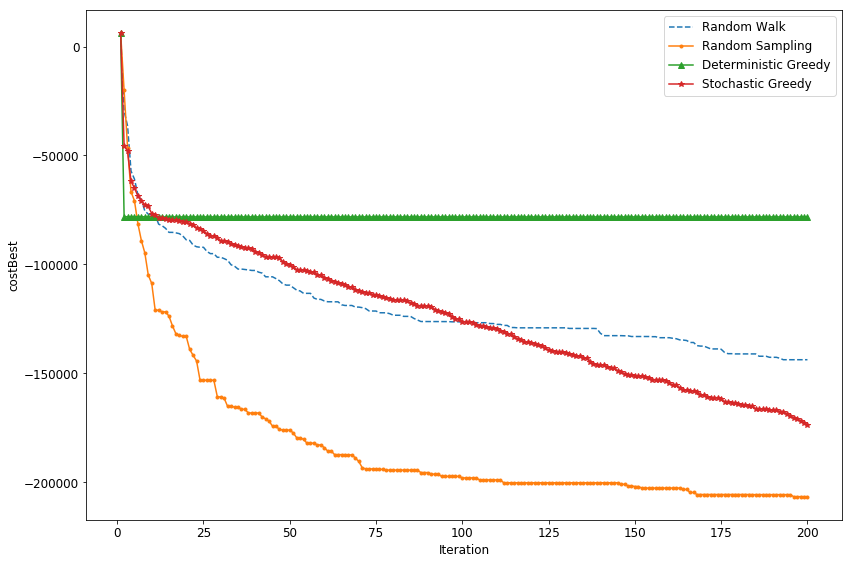

In [36]:
plt.figure(figsize=[12,8])
plt.plot(rw_combine.groupby('i').mean().costBest, '--')
plt.plot(rs_combine.groupby('i').mean().costBest, '.-')
plt.plot(gd_combine.groupby('i').mean().costBest, '^-')
plt.plot(gs_combine.groupby('i').mean().costBest, '*-')
plt.xlabel('Iteration')
plt.ylabel('costBest')
plt.legend(['Random Walk', 'Random Sampling', 'Deterministic Greedy', 'Stochastic Greedy'])
plt.tight_layout()

Compute and report the average and standard deviation of costBest at 100th iteration for each algorithm.

In [24]:
# Random Walk
print('Random Walk')
print('mean: ', rw_combine.groupby('i')['costBest'].describe().loc[100]['mean'])
print('std: ', rw_combine.groupby('i')['costBest'].describe().loc[100]['std'])

Random Walk
mean:  -126469.95114
std:  78155.0432075


In [25]:
# Random Sampling
print('Random Sampling')
print('mean: ', rs_combine.groupby('i')['costBest'].describe().loc[100]['mean'])
print('std: ', rs_combine.groupby('i')['costBest'].describe().loc[100]['std'])

Random Sampling
mean:  -198096.1105
std:  15591.961165


In [26]:
# Deterministic Greedy
print('Deterministic Greedy')
print('mean: ', gd_combine.groupby('i')['costBest'].describe().loc[100]['mean'])
print('std: ', gd_combine.groupby('i')['costBest'].describe().loc[100]['std'])

Deterministic Greedy
mean:  -78194.2666667
std:  66134.8344056


In [27]:
# Stochastic Greedy
print('Stochastic Greedy')
print('mean: ', gs_combine.groupby('i')['costBest'].describe().loc[100]['mean'])
print('std: ', gs_combine.groupby('i')['costBest'].describe().loc[100]['std'])

Stochastic Greedy
mean:  -126329.216008
std:  61305.6665328


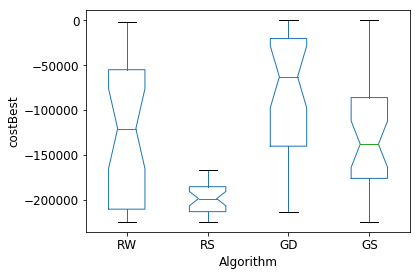

In [37]:
mean_100_iter = pd.DataFrame()
mean_100_iter['RW'] = rw_combine['costBest'].loc[100].values
mean_100_iter['RS'] = rs_combine['costBest'].loc[100].values
mean_100_iter['GD'] = gd_combine['costBest'].loc[100].values
mean_100_iter['GS'] = gs_combine['costBest'].loc[100].values

mean_100_iter.boxplot(grid=False, notch=True)
plt.xlabel('Algorithm')
plt.ylabel('costBest')
plt.tight_layout()

## Final comments

Random sampling and stochastic greedy search seem to be able to find the right solution more often than the other two algorithms. This is reflected in their much lower average costBest. 

Random sampling is able to find the best solution and the low standard deviation indicates that it is consistently able to find the best solution. Judging from the combined plot, random sampling is also able to find the best solution much faster than the others. 

### 2. Simulated Annealing
Assume you generate a random number r between 0 and 1 (uniform distribution) .

Explain whether or not you accept the uphill move for the following cases. (Delta Cost= ΔCost)

a.	Delta cost=5, T=100, r= .001 <br>
b.	Delta cost=5, T=100, r= .5 <br>
c.	Delta cost=5, T=50, r= .001 <br>
d.	Delta cost=5, T=50 r= .5 <br>
e.	Delta cost=10,T=100 r= .5 <br>
f.	Delta cost = 10, T=100, r=.001 <br>
g.	What is the purpose of having the T (Ti= alpha* Ti-1,  alpha <1)  get smaller as the iterations increase in Simulated Annealing.?


In [29]:
def decide_SA(delta_cost, T, r):
    p = np.exp(-delta_cost/T)
    print('Acceptance Probability: {0:f}'.format(p))
    if r <= p:
        print('Accept uphill move')
    else:
        print('Reject uphill move')
    return 

In [30]:
#a. Delta cost=5, T=100, r= .001
decide_SA(5,100,0.001)

Acceptance Probability: 0.951229
Accept uphill move


In [31]:
#b. Delta cost=5, T=100, r= .5 
decide_SA(5,100,.5)

Acceptance Probability: 0.951229
Accept uphill move


In [32]:
#c. Delta cost=5, T=50, r= .001 
decide_SA(5,50,.001)

Acceptance Probability: 0.904837
Accept uphill move


In [33]:
#d. Delta cost=5, T=50 r= .5 
decide_SA(5,50,.5)

Acceptance Probability: 0.904837
Accept uphill move


In [34]:
#e. Delta cost=10,T=100 r= .5 
decide_SA(10,100,.5)

Acceptance Probability: 0.904837
Accept uphill move


In [35]:
#f. Delta cost = 10, T=100, r=.001 
decide_SA(10,100,.001)

Acceptance Probability: 0.904837
Accept uphill move


## Part g
The purpose is that as the iterations increase, the probability of accepting an uphill move will decrease. The reason is that, during the early stage of searching (early iterations), we would like to explore the whole space since it's still largely unknown. In the later stage of searching (late iterations), we have done enough exploration and we would like to exploit what we have already known, hence we are less inclined to risk an uphill move in order to find a better solution. 